In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

In [2]:
TTable_Obs=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_2.xlsx')
TTable_Obs_T=TTable_Obs.T
TTable_Obs_T=TTable_Obs_T.drop([3],axis=1)
TTable_Obs_T=TTable_Obs_T.rename(columns={4:3})
TTable_Obs_T=TTable_Obs_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

TTable=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_3.xlsx')
TTable_T=TTable.T
TTable_T=TTable_T.drop([3],axis=1)
TTable_T=TTable_T.rename(columns={4:3})
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})

In [3]:
TTable_T

T      G       C        R
2021-12-01  1487.2  289.4  4651.3  34233.1
2021-11-01  1484.1  270.2  3777.0  41268.9
2021-10-01  1227.2  247.5  3396.8  41043.2
2021-09-01  1062.9  262.5  3535.4  40453.9
2021-08-01   899.6  250.2  3280.1  36833.0
2021-07-01   944.6  203.1  3347.2  34394.9
2021-06-01  1174.3  240.1  3866.7  34925.1
2021-05-01  1129.9  262.3  3688.1  37585.8
2021-04-01  1030.5  222.1  3684.7  35945.1
2021-03-01  1129.5  259.2  3929.9  33152.6
2020-12-01  1526.6  289.1  4871.1  35484.1
2020-11-01  1497.5  257.6  4016.8  40566.0
2020-10-01  1274.0  222.3  3708.5  39514.2
2020-09-01  1124.8  222.0  3866.2  38576.5
2020-08-01   967.2  234.8  3412.8  35294.7
2020-07-01   889.3  178.8  3308.3  33570.6
2020-06-01  1059.3  193.4  3612.2  32202.5
2020-05-01  1017.8  203.1  3376.1  33525.9
2020-04-01   798.7  154.7  3082.7  31972.8
2020-03-01   689.0  147.2  2609.0  28177.8
2019-12-01  1490.5  267.9  4428.1  26449.9
2019-11-01  1427.0  212.0  3465.1  38776.7
2019-10-01  1153.2  198.6  3228.1  38093.8
2019-09-01  1058.4  204.7  3397.5  38104.3
2019-08-01   946.0  212.4  3051.7  34494.9
2019-07-01   934.1  174.9  3056.2  33896.3
2019-06-01  1091.4  217.9  3668.8  33073.3
2019-05-01  1044.1  220.1  3222.8  33878.1
2019-04-01  1000.1  185.5  3053.9  32955.7

In [4]:
array = TTable_T.values
X = array[9:,0:3]
Y = array[9:,3]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)

C:\Users\AllenVlen\anaconda3_1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
X_new= array[:9,0:3]
Prediction=regr.predict(X_new)

In [6]:
array_Obs = TTable_Obs_T.values
Y_Obs=array_Obs[:9,3]

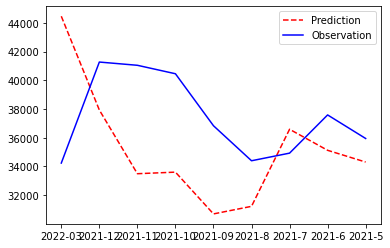

In [7]:
Date=['2022-03', '2021-12','2021-11',
       '2021-10', '2021-09',
       '2021-8','2021-7','2021-6','2021-5']
#YObserv=array[:9,3]

plt.plot(Date,Prediction,'r--',label="Prediction")
plt.plot(Date,Y_Obs,'b',label="Observation")
plt.legend()

In [8]:
regr.score(X_test,Y_test)

-1.577708682281843

In [9]:
regr.score(X_train,Y_train)

-1.577447329455592

In [10]:
regr.score(X_new,Prediction)

1.0

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Obs,Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Obs,Prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Obs,Prediction)))

Mean Absolute Error: 4783.730684747616
Mean Squared Error: 31003015.930847567
Root Mean Squared Error: 5568.035194828384
